<a href="https://colab.research.google.com/github/simoncellia/Curso_DSP/blob/main/DSP_CLASE2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# @title Cargar archivos
from google.colab import drive
drive.mount('/content/gdrive')
!git clone https://github.com/simoncellia/Curso_DSP.git

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
fatal: destination path 'Curso_DSP' already exists and is not an empty directory.


# **Procesamiento digital de señales:**

##  **Señal: Descripción de la evolución de un fenómeno**

* Clima -> temperatura
* Sonido -> presión
* Sonido -> desvió magenetico
* Intensidad luminica -> inensidad de grises e una imagen.


## **Procesamiento:**

### Análisis: entendiendo / interpretando la información contenida o trasportada por la señal
* extracción de mayor información.

### **Síntesis**: Creando señales con algun tipo de contenido de información.
* generación de sonidos o comunicacion.




Las señales no son exclusivas de los sitemas digitales.

La descripicon de un fenomento puede ser por ejemplo la descripción matemtica de la caida libre.
$$y(t)=v_y.t - \dfrac{1}{2}. g . t^2$$

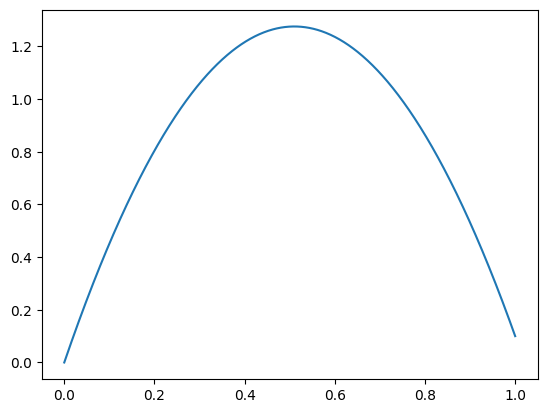

In [8]:
# @title Caida libre
import numpy as np
import matplotlib.pyplot as plt

t=np.linspace(0,1,1000)
vy=5; g=9.8;
y=vy*t-0.5*g*t*t

plt.plot(t,y)
plt.show()

Un circuito RC responderá:
$U_a(t)=U_e\left(1-e^{-{\dfrac{t}{RC}}}\right)$
<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/e/e8/Tiefpass.svg?uselang=es" width="400"/>
</div>



Estos modelos tiene en común son una funcion de la variable real tiempo.

$$f: \mathbb{R} → \mathbb{R}$$


## ahora que pasa si tenemoos algo como esto?

$$f(t)=???$$

## cual es la función que describe esto?
esto no es tan facil de describir para funciones analogicas pero si se pueden utilizar dipositivos que permitan registrar estas variaciones y posteriormente reproducirlas. Con ciertas dificultades para alterarlas o modificarlas.

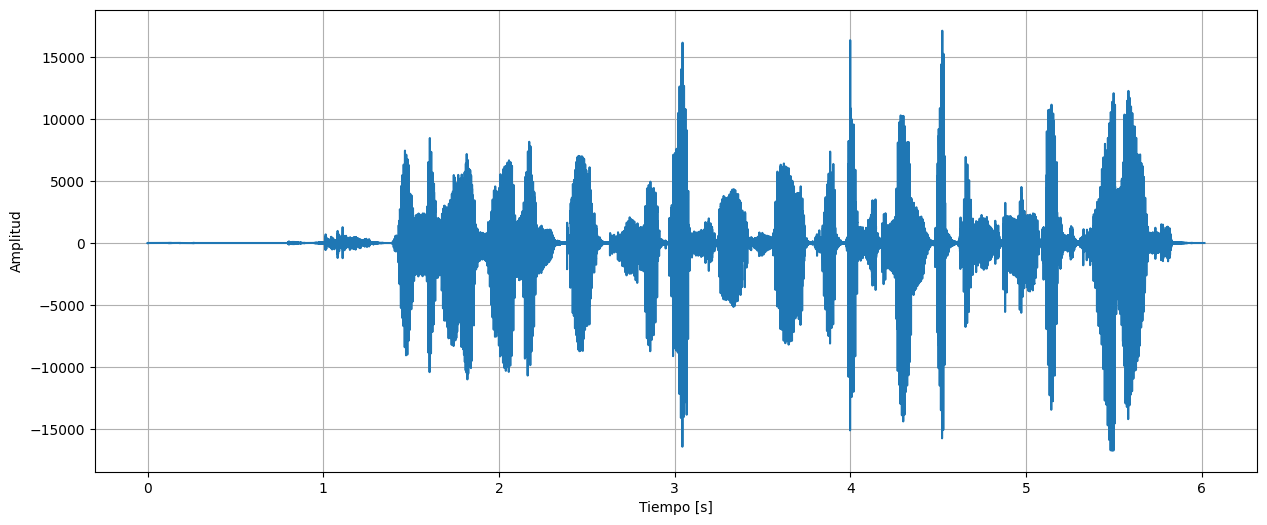

In [9]:
# @title audio
from scipy.io.wavfile import read
from IPython.display import Audio

fs, x=read("/content/Curso_DSP/audio/record.wav") # carga señal de audio

t=np.arange(len(x))/fs
plt.figure(figsize=(15,6))
plt.plot(t,x)
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid()
plt.show()

Audio(x,rate=fs)

Ahora si en cambio pasamos a una version digitalizada, no necesitamos soportes como discos marcados mecánicamente, cintas mageneticas o rollos de papel registrando variaciones. Es decir pasariamos a tencer un conjunto de valores que tienen cierta relación con las variaciones esperimentadas por la señal

[-2985 -2118 -1357  -779  -386  -200  -141  -161  -196  -196  -108    38
   255   510   766   973  1093  1080   936   677   349    -7  -320  -555
  -699  -746  -720  -646  -543  -406  -218    26   336   720  1191  1721
  2292  2880  3424  3863  4199  4383  4441  4410  4302  4151  4004  3830]


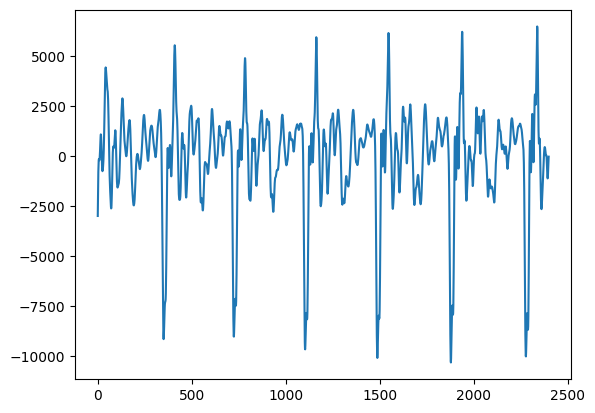

In [10]:
# @title Componentes de la señal grabada entre $t=2$ y $t=2.001$
print(x[int(fs*2):int(fs*2.001)])

plt.plot(x[int(fs*2):int(fs*2.05)])

# Digital:
## componentes clave:
* **tiempo discreto**
* **amplitud discreta**



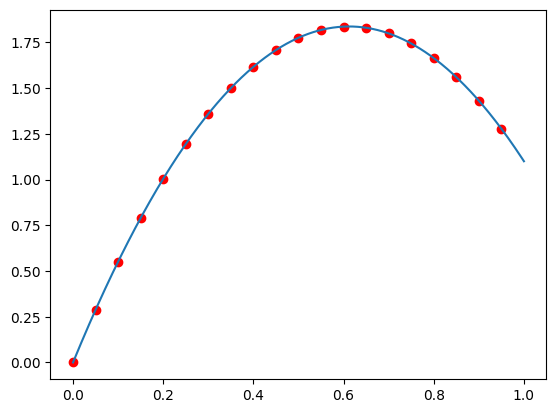

In [11]:
# @title un conjunto de mediciones consiteria una forma practica de representar estas señales
import numpy as np
import matplotlib.pyplot as plt

tf=1
t=np.linspace(0,tf,1000)
vy=6; g=9.8;
y=vy*t-0.5*g*t*t

plt.plot(t,y)

t0=0.2
t1=0.8
n=np.arange(20)

Ts=tf/len(n)
yd=np.interp(n*Ts, t, y)

plt.scatter(n*Ts,yd,c="r")

plt.show()


Ademas obtenemos algunas ventajas practicas como por ejemplo si queremos obtener el valor medio de un modelo analogico, hay que recurrir al calculo con la descripción de la señal.

en este caso si queremo analizar el valor medio d la señal puede ser bastante dificil:

$$\bar{x}= \dfrac{1}{b-a} \int_a^b{{f(t)dt}}$$

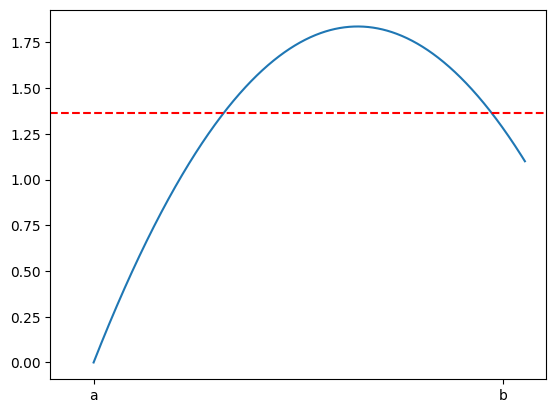

In [12]:
# @title Requiriendo cálculo!
plt.plot(t,y)
plt.xticks([0,(len(n)-1)*Ts],["a","b"])
plt.xlim(-0.1,(len(n)-1)*Ts+0.1)
plt.axhline(np.mean(y),c="r",linestyle='--')


En cambio si tenemos una version discreta la obtención del valor medio seria:

$$\bar{x}= \dfrac{1}{N}\sum_{n=0}^{N-1}x[n]$$

y para esto no necesitamos herramientas complejas de análisis.

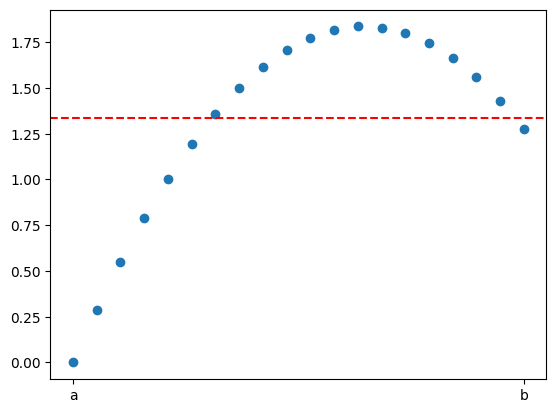

In [13]:
# @title Requiriendo solo algebra
plt.scatter(n,yd)
plt.xticks([0,len(n)-1],["a","b"])
#plt.xlim(-0.1,(len(n)-1)*Ts+0.1)
plt.axhline(np.mean(yd),c="r",linestyle='--')


Entonces en nuestro caso empezaremos a tomar la señales como secuencias:

en su versión:

$$x:\mathbb{Z} → \mathbb{V}$$

de un cojunto de enteros $\mathbb{Z}$ mapeados a valores $ \mathbb{V}$ que podrian ser discretos (enteros) en el caso de señales completamente digitales.

$$x[n]= ..., 0.1234 , 0.1754, -1.7932,0.3653,-0.2846... $$



ahora puede estas represetaciones brindar información suficiente parar representar un fenomeno o estamos perdiendo mucha información?

Esto fue resuelto por Harry Nyquist and Claude Shannon generando una equivalencia con algunas condicione.

entonces se puede generar bajo ciertas condiciones una función continua $x(t)$ partiendo de una señal muestreada $x[n]$

$$x(t)=\sum_{n=-∞}^∞ x[n] sinc\left( \dfrac{t-n*Ts}{Ts} \right)$$


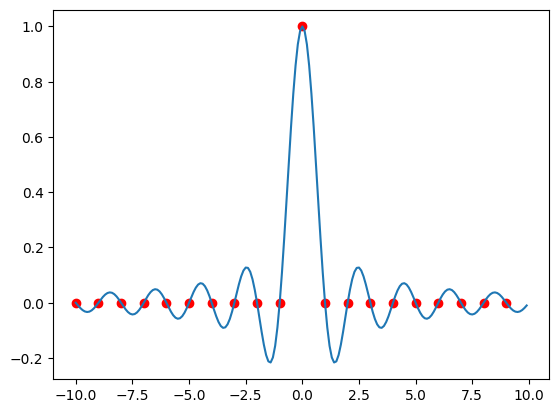

In [14]:
t=np.arange(-10,10,0.1)
n=np.arange(-10,10,1)
plt.plot(t,np.sinc(t))
plt.scatter(n,np.sinc(n),c="r")

12


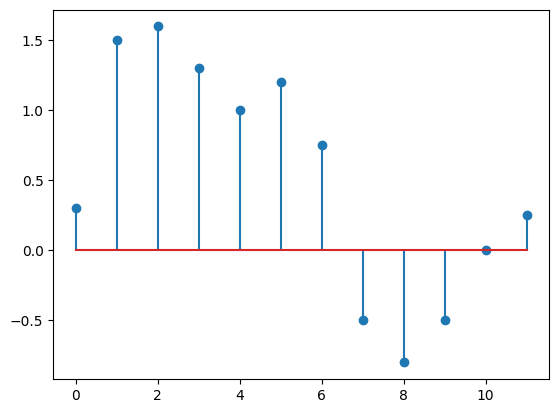

4800


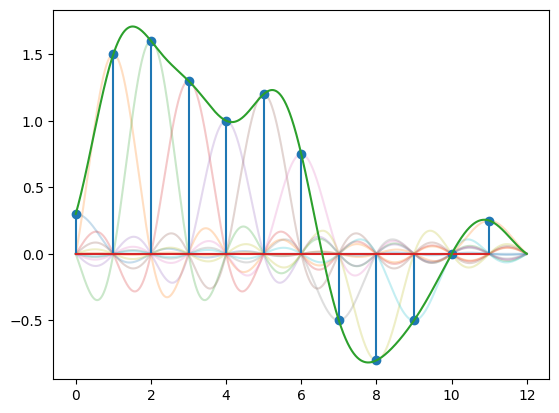

In [15]:
Ts=1
T2=0.05

x=[0.3 , 1.5 , 1.6 , 1.3 , 1 , 1.2 , 0.75 , -0.5  ,-0.8  ,-0.5, 0 , 0.25]

print(len(x))
n=np.arange(len(x))
t1=n*Ts

plt.stem(t1,x)

plt.show()

nuevas_muestras=(Ts/T2)*len(n)

m=np.arange(0,240,T2)

print(len(m))
t2=m*T2
suma=np.zeros(len(m))

for n in range(len(x)):
  plt.plot(t2,x[n]*np.sinc((m*T2-n*Ts)/Ts),alpha=0.25)

  suma=suma+x[n]*np.sinc((m*T2-n*Ts)/Ts)

plt.stem(t1,x)
plt.plot(t2,suma)




Bien ahora veamos que pasa con la amplitud, en las señales analógicas tendremos infinitos valores para definir la variación de la magnitud analizada. Sin embargo en el caso digital solo disponemos del conjunto $\{0 , 1\}$

Esto nos permite entre otras cosas, poder guardarlas en un espacio finito de memoria, también nos permitira recuperarla y procesarla.

<StemContainer object of 3 artists>

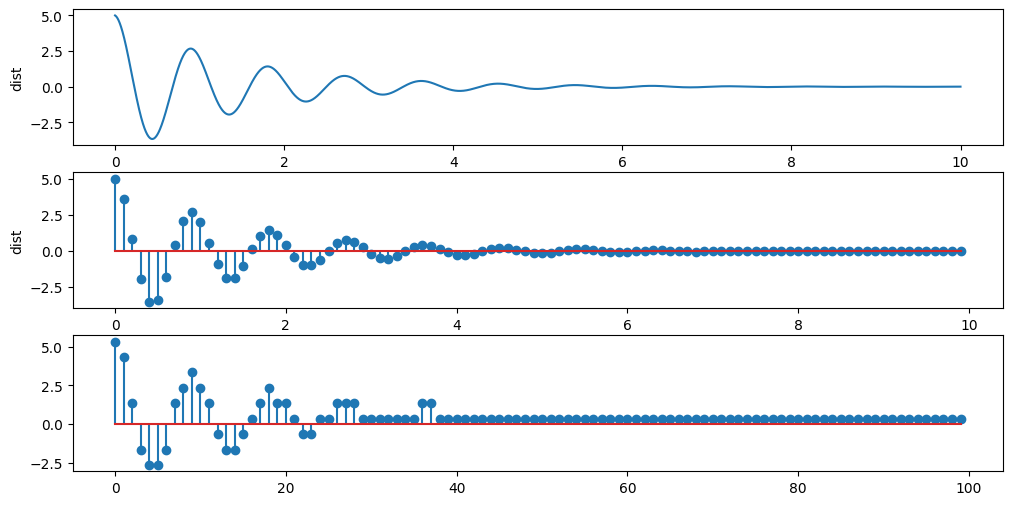

In [ ]:
# @title Señal "continua" / "en tiempo discreto" / "digital-cuantizada"
import numpy as np
import matplotlib.pyplot as plt

t=np.linspace(0,10,10000)
x=5*np.power(0.5,t)*np.cos(2*np.pi*1.1*t)


fig, ax =plt.subplots(3,figsize=(12,6))
ax[0].plot(t,x)
ax[0].set_xlabel("t")
ax[0].set_ylabel("dist")

n=np.arange(0,100,1)
td=n*0.1
xd=5*np.power(0.5,td)*np.cos(2*np.pi*1.1*td)


ax[1].stem(td,xd)
ax[1].set_xlabel("n")
ax[1].set_ylabel("dist")


bins=np.arange(0,500,1)
xdigit=np.digitize(x[::100]-min(x),bins=bins)


plt.stem(xdigit+min(x))